# 향후 판매량 예측 경진대회
## 회귀, RMSE 평가
### 대회 정보 : 2018.2 ~ 2023.1, 13613팀, 특수 플레이그라운드 대회
#### Coursera라는 learning platform에서 제공하는 수업 'How to win a data science competition' 의 final project로 데이터셋은 1C company라는 러시아 소프트웨어 회사에서 제공받음.
### 목표 : 과거 판매 데이터(2013.1 ~ 2015.10) 기반 향후 판매량(2015. 11 각 상점 상품별 원간 판매량) 예측 (*단, 월간 판매량 : 0 ~ 20)
### 훈련 데이터 : 일별 판매 내역, 상점, 상품, 상품분류에 관한 추가 데이터
#### - sales_train, shops, items, item_categories

In [13]:
import os
os.getcwd()

'D:\\DS_project\\study\\ch10'

In [16]:
import pandas as pd
data_path = ''

In [23]:
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')

In [24]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
## data_block_num 0 : 2013년 1월, 1 : 2013년 2월, ..., 33 : 2015년 10월

In [25]:
sales_train.info() # 참고 : DataFrame행이 1,690,785개보다 많거나 열이 100개보다 많으면 info() 함수는 비결측값 개수 출력 안함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [36]:
import numpy as np
df=pd.DataFrame({
                'Student':['Hisila', 'Shristi','Zeppy','Alina','Jerry'],
                'Height':[1.63,1.5,np.nan,np.nan,1.4],
                'Weight':[np.nan,56,73,np.nan,44]
                })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  5 non-null      object 
 1   Height   3 non-null      float64
 2   Weight   3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [37]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [32]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [38]:
# 시계열 Data에서 여러 폴드로 나눠 훈련하는 것은 바람직하지 않음. 과거, 미래 데이터 뒤섞임.

In [39]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [40]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [41]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [42]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [43]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [44]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [95]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# sales_train, shops, items, item_categroies 병합

In [92]:
train = sales_train.merge(shops, on='shop_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""


In [93]:
train = train.merge(items, on = 'item_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [94]:
train = train.merge(item_categories, on='item_category_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


# ------------------------------------------------------------------------
# Dataframe merge
# merge on 
# merge how = left, right, inner, outer, cross
### DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [54]:
df_test = sales_train[0:4]
df_test

In [80]:
# df_test_merge = df_test.merge(shops, on='shop_id', how='left')
df_test_merge = df_test.merge(shops, on=None, how='cross')
df_test_merge

,date,date_block_num,shop_id_x,item_id,item_price,item_cnt_day,shop_name,shop_id_y
0,02.01.2013,0,59,22154,999.00,1.0,"!Якутск Орджоникидзе, 56 фран",0
1,02.01.2013,0,59,22154,999.00,1.0,"!Якутск ТЦ ""Центральный"" фран",1
2,02.01.2013,0,59,22154,999.00,1.0,"Адыгея ТЦ ""Мега""",2
3,02.01.2013,0,59,22154,999.00,1.0,"Балашиха ТРК ""Октябрь-Киномир""",3
4,02.01.2013,0,59,22154,999.00,1.0,"Волжский ТЦ ""Волга Молл""",4
...,...,...,...,...,...,...,...,...
235,06.01.2013,0,25,2554,1709.05,1.0,Цифровой склад 1С-Онлайн,55
236,06.01.2013,0,25,2554,1709.05,1.0,"Чехов ТРЦ ""Карнавал""",56
237,06.01.2013,0,25,2554,1709.05,1.0,"Якутск Орджоникидзе, 56",57
238,06.01.2013,0,25,2554,1709.05,1.0,"Якутск ТЦ ""Центральный""",58


# -----------------------------------------------------------------------------

In [98]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    
    return summary

resumetable(train)

데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


# 데이터 시각화

In [112]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='item_cnt_day'>

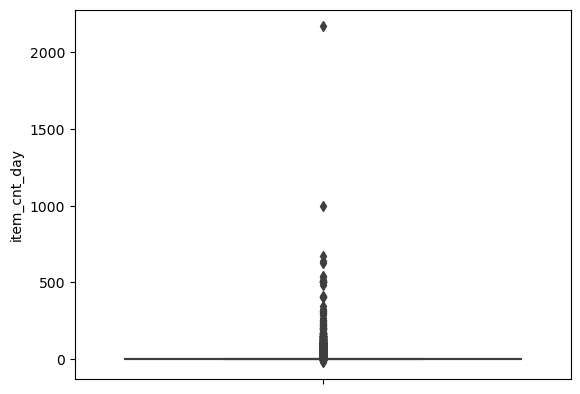

In [114]:
sns.boxplot(y='item_cnt_day', data=train)

In [ ]:
# 이상치가 많아 박스plot이 제대로 안보임
# 이상치 기준 알아서...여기서는 1,000이상

In [116]:
train[train['item_cnt_day']>1500]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2909818,28.10.2015,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


In [121]:
train[train['item_id'] == 11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
58323,08.01.2013,0,12,11373,1000.00,1.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
58324,31.01.2013,0,12,11373,97.80,5.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
176790,01.02.2013,1,12,11373,229.00,1.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
176791,04.02.2013,1,12,11373,130.00,1.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
302468,29.03.2013,2,12,11373,139.50,2.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
...,...,...,...,...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
2909830,06.10.2015,33,12,11373,208.80,5.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
2909831,05.10.2015,33,12,11373,140.75,16.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара
2909832,02.10.2015,33,12,11373,648.50,2.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


<AxesSubplot:xlabel='item_cnt_day', ylabel='count'>

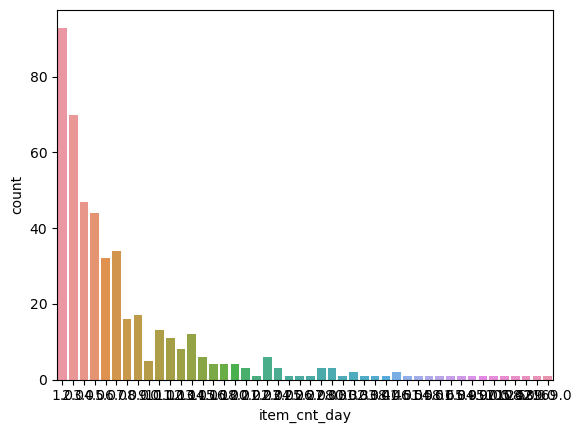

In [123]:
sns.countplot(x='item_cnt_day', data=train[train['item_id'] == 11373])

<AxesSubplot:ylabel='item_price'>

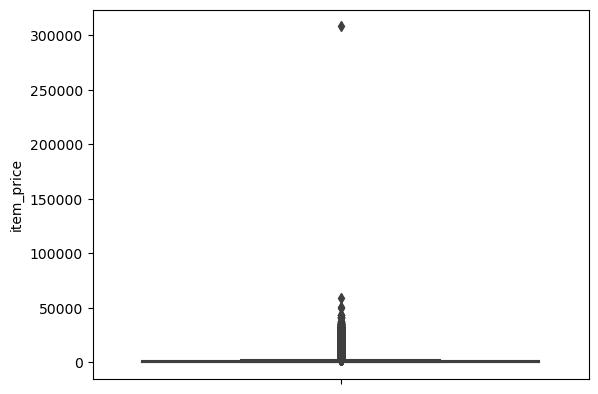

In [124]:
import seaborn as sns
sns.boxplot(y='item_price', data=train)

In [ ]:
# 이상치 여기서는 50,000 이상

In [106]:
train[train['item_price']>100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
1163158,13.12.2013,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса


In [107]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
1163158,13.12.2013,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса


In [130]:
train['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
579          1
19388        1
19326        1
6992         1
7640         1
Name: item_id, Length: 21807, dtype: int64

In [131]:
# 그룹화
# groupby : split, apply, combine
# group = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})

In [137]:
group = train.groupby('date_block_num')
group

In [138]:
group = group.agg({'item_cnt_day':'sum'})
group

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [140]:
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


In [ ]:
# -------------------------------------------------------------------
# test groupby, sum, agg

In [144]:
group_test = train.groupby('date_block_num').sum()
group_test.head()

,shop_id,item_id,item_price,item_cnt_day,item_category_id
date_block_num,,,,,
0,3417068,1183971787,8.221187e+07,131479.0,4574740
1,3111582,1076043980,7.558019e+07,128090.0,4319172
2,4016457,1220911622,8.429831e+07,147142.0,4777604
3,3164978,971345965,6.151282e+07,107190.0,3804157
4,3093999,950372988,5.727413e+07,106970.0,3694879


In [149]:
group_test = train.groupby('date_block_num').agg({'item_price' : 'mean', 'item_cnt_day' : 'sum'})
group_test.head()

,item_price,item_cnt_day
date_block_num,,
0,710.622127,131479.0
1,695.866856,128090.0
2,694.688063,147142.0
3,653.633797,107190.0
4,624.179993,106970.0


In [150]:
# --------------------------------------------------------------------------

# 월별 판매량

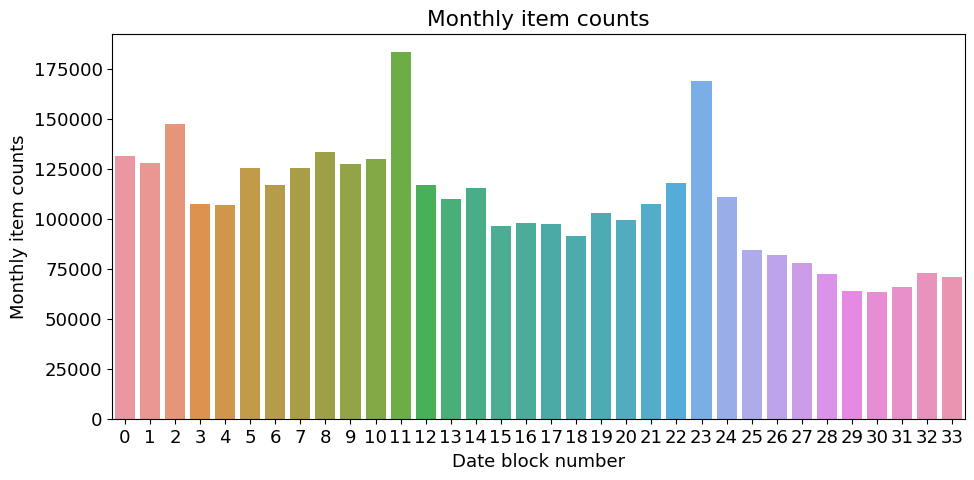

In [156]:
mpl.rc('font', size=13)
figure, ax=plt.subplots()
figure.set_size_inches(11,5)

group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day' : 'sum'})
group_month_sum = group_month_sum.reset_index()

sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)
ax.set(title='Monthly item counts', xlabel='Date block number', ylabel = 'Monthly item counts');

# 상품분류별 판매량

In [158]:
train['item_category_id'].nunique()

84

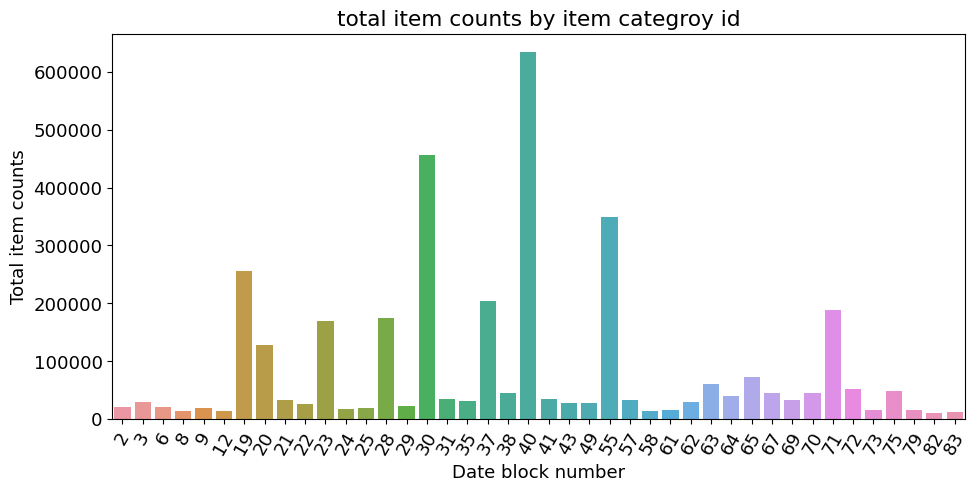

In [163]:
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='total item counts by item categroy id',
      xlabel='Date block number',
      ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=60)

In [164]:
# 상점별 판매량

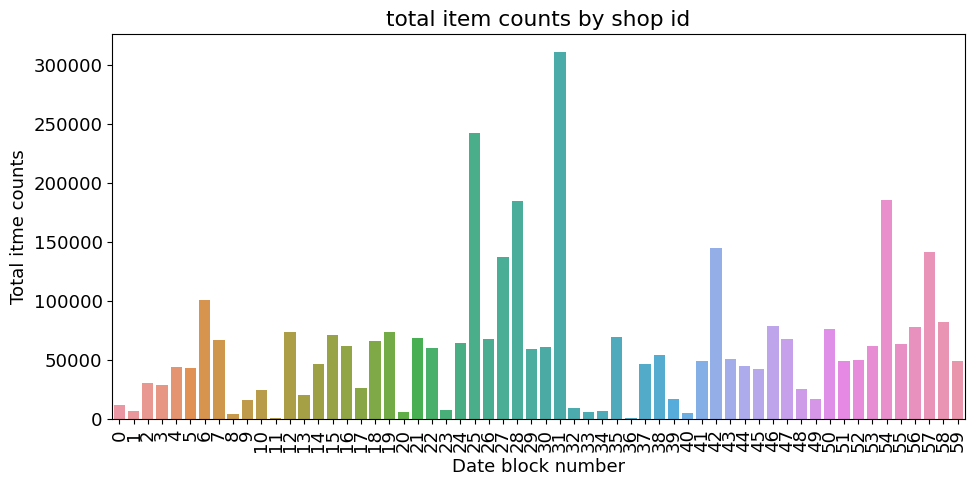

In [166]:
figure, ax= plt.subplots()
figure.set_size_inches(11,5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day' : 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum)
ax.set(title='total item counts by shop id',
       xlabel='Date block number',
       ylabel='Total itme counts')
ax.tick_params(axis='x', labelrotation=90)